# Inverse Transform Sampling and Probability Inverse Transform

Camilo José Torres Jiménez

Segundo Semestre de 2019

# Inverse Transform Sampling. Ej: Distribución Exponencial

Si $U \sim \mathcal{U}(0,1)$, $F(.)$ es una función de distribución acumulativa y $F^{-}(u) = \inf \left\{ x : F(x) \geq u \right\}$ para $0 < u < 1$, entonces la variable aleatoria $X = F^-(U)$ tiene como función de distribución acumulativa $F(.)$.

## Generar n realizaciones de una variable aleatoria uniforme

In [49]:
### Número de realizaciones a generar
n <- 10000
### Generar las n realizaciones para una distribución uniforme
u <- runif(n)

## Histograma de las realizaciones generadas

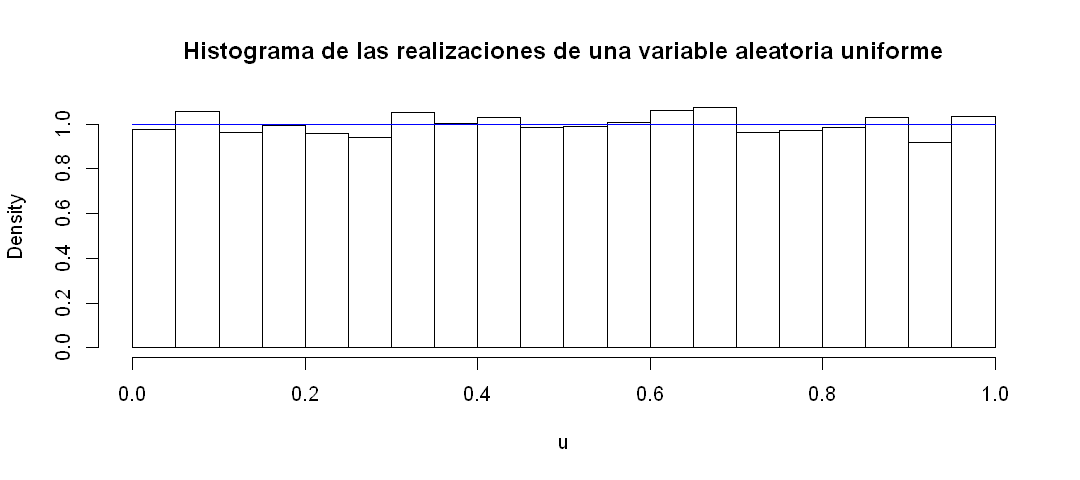

In [50]:
### Cambia el tamaño del gráfico
options(repr.plot.width = 9, repr.plot.height = 4)
### Produce el histograma
hist(u, main="Histograma de las realizaciones de una variable aleatoria uniforme", 
     freq=FALSE, breaks = 20)
### Produce la linea asociada a la función de densidad teórica de una distribución
### uniforme continua
lines(c(0,1), c(1,1), col="blue")

## Función de distribución acumulativa de una variable aleatoria exponencial

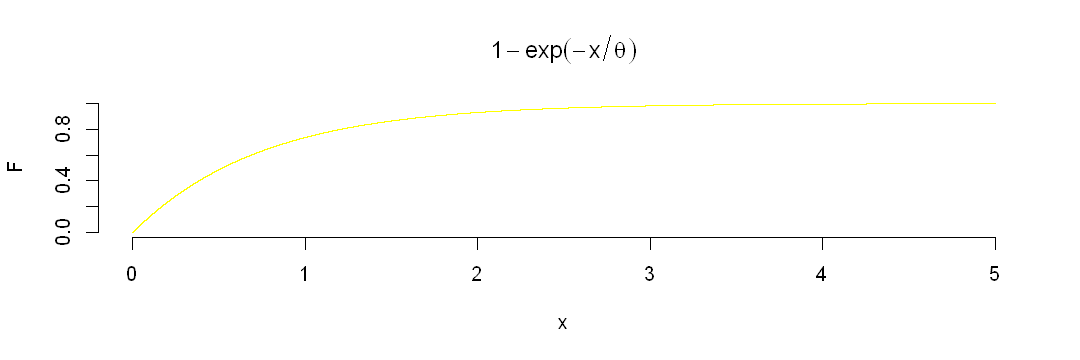

In [51]:
### Crear la función de distribución acumulativa asociada a la exponencial
F.exp <- function(x, scale = 1){ 1 - exp(-x/scale) }
### Cambia el tamaño del gráfico
options(repr.plot.width = 9, repr.plot.height = 3)
### theta_1 será el valor para el parámetro de escala
theta_1 <- 0.75
### Produce el gráfico de la función creada
curve(F.exp(x, scale = theta_1), 0, 5, 1e5, ylim = c(0, 1), ylab = "F", 
      col = "yellow", bty="none", main = expression(1-exp(-x/theta)))

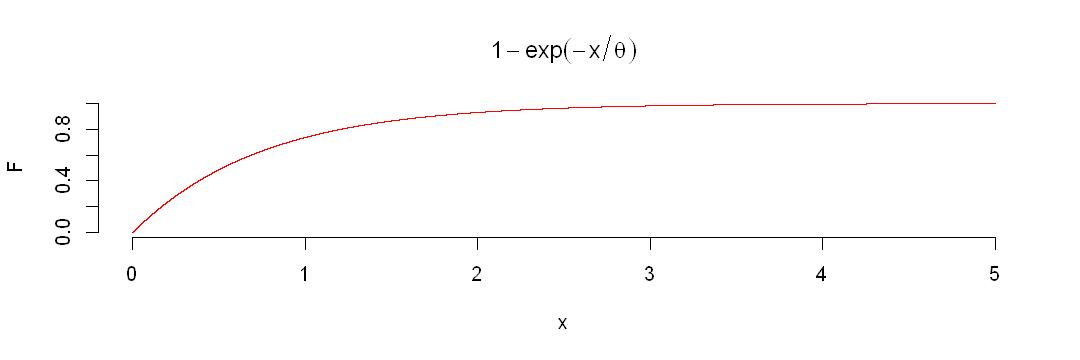

In [52]:
### Produce el mismo gráfico pero a partir de la función existente en R (pexp)
curve(pexp(x, rate = 1/theta_1), 0, 5, 1e5, ylim = c(0, 1), ylab = "F", 
      col = "red", bty="none", main = expression(1-exp(-x/theta)))

## Función cuantil de una variable aleatoria exponencial

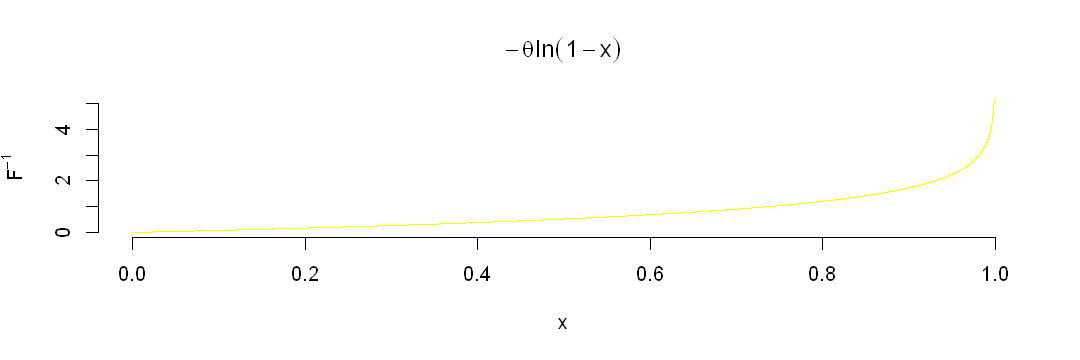

In [53]:
### Crear la función de distribución acumulativa asociada a la exponencial
Q.exp <- function(p, scale = 1){ -scale * log(1 - p) }
### Cambia el tamaño del gráfico
options(repr.plot.width = 9, repr.plot.height = 3)
### theta_1 será el valor para el parámetro de escala
theta_1 <- 0.75
### Produce el gráfico de la función creada
curve(Q.exp(x, scale = theta_1), 0, 1, 1e5, ylim = c(0, 5), xlab = "x",
      ylab = expression(F^-1), col = "yellow", bty="none", 
      main = expression(-theta * ln(1-x)))

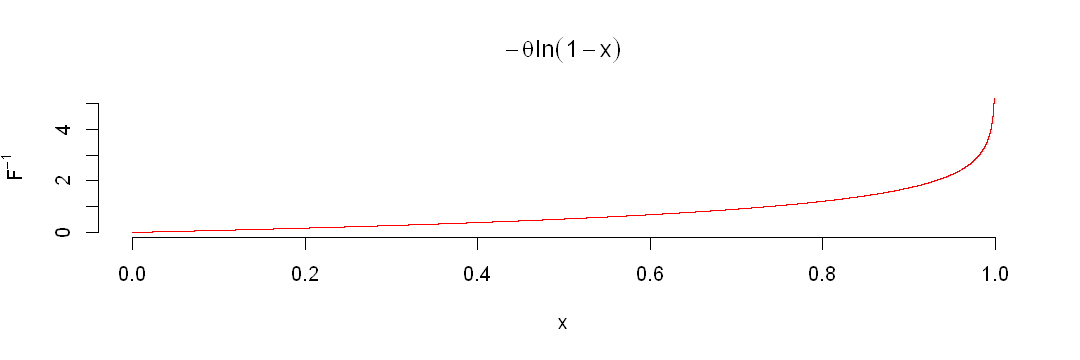

In [54]:
### Produce el mismo gráfico pero a partir de la función existente en R (qexp)
curve(qexp(x, rate = 1/theta_1), 0, 1, 1e5, ylim = c(0, 5), xlab = "x",
      ylab = expression(F^-1), col = "red", bty="none", 
      main = expression(-theta * ln(1-x)))

## Generar n realizaciones de una variable aleatoria exponencial

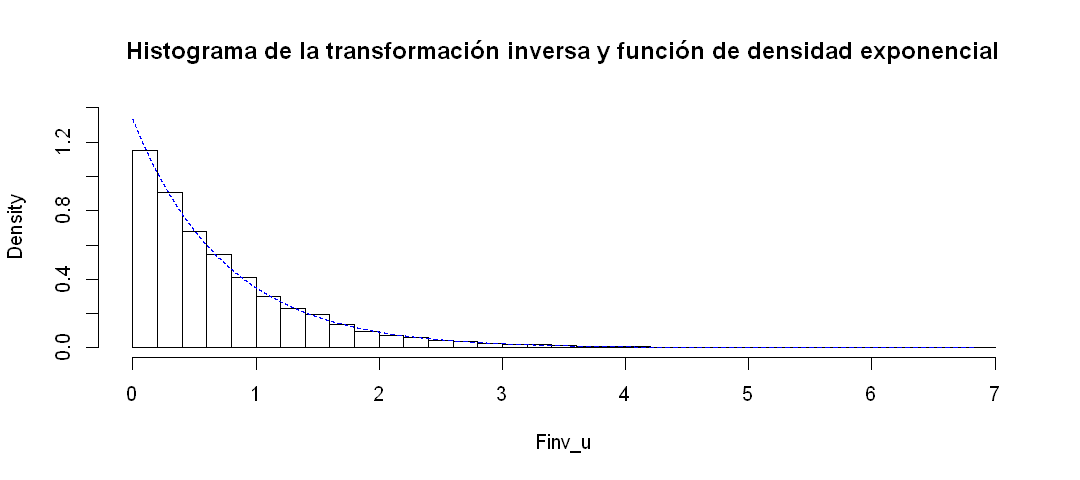

In [55]:
### Cambia el tamaño del gráfico
options(repr.plot.width = 9, repr.plot.height = 4)
### Histograma de los valores resultantes al aplicar la función cuantil
### a las realizaciones de una v.a. uniforme
Finv_u <- Q.exp(u, theta_1)
hist(Finv_u, freq = FALSE, breaks = 40, ylim = c(0, 1.4),
     main = "Histograma de la transformación inversa y función de densidad exponencial")
### Función de densidad asociada a la distribución exponencial
curve(exp(-x/theta_1)/theta_1, min(Finv_u), max(Finv_u), add = TRUE, 
      n = 1e5, lty = 2, col = "blue")

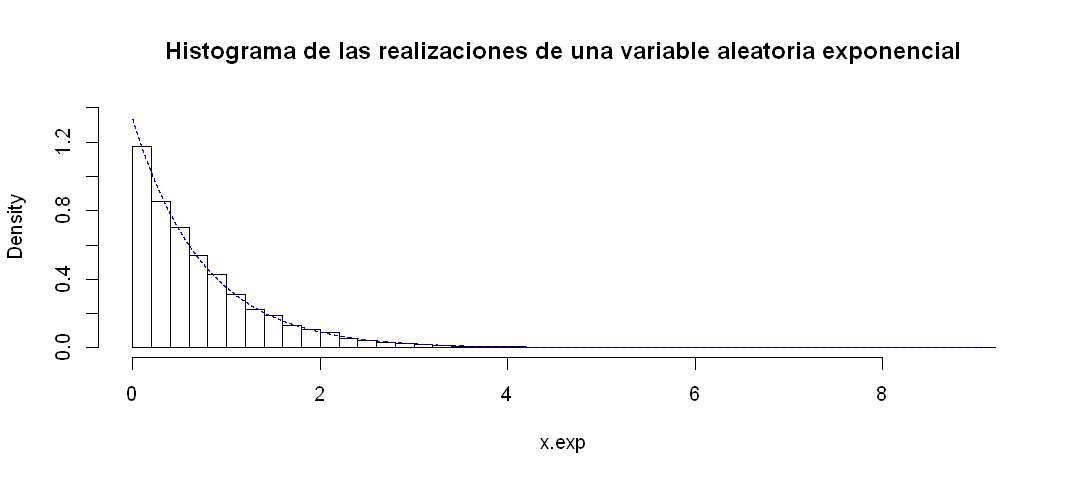

In [56]:
### Generar las n realizaciones para una distribución exponencial usando
### la funcion existente en R (rexp)
x.exp <- rexp(n, rate = 1/theta_1)
### Cambia el tamaño del gráfico
options(repr.plot.width = 9, repr.plot.height = 4)
### Histograma de los valores generados asociados a una distribucion exponencial 
hist(x.exp, freq = FALSE, breaks = 40, ylim = c(0, 1.4), 
     main = "Histograma de las realizaciones de una variable aleatoria exponencial")
### Función de densidad asociada a la distribución exponencial usando 
### la funcion dexp de R
curve(dexp(x, rate=1/theta_1), min(x.exp), max(x.exp), add = TRUE, 
      n = 1e5, lty = 2, col = "blue")

# Probability Inverse Transform. Ej: Distribución BMT
Si $X$ es una variable aleatoria continua con función de distribución acumulativa $F_X(.)$, entonces la variable aleatoria $U = F_X(X)$ tiene distribución uniforme continua en $(0,1)$.

## Generar n realizaciones de una variable aleatoria con distribución BMT

In [57]:
### Instalar y cargar la libreria de la distribución BMT
if(!require(BMT)) { install.packages("BMT"); require(BMT) }
library(BMT)

### Número de realizaciones a generar
n <- 10000
### Los parámetros de la distribución BMT podrían ser fijos o generados aleatoriamente
kappa_l <- runif(1)
kappa_r <- runif(1)
### Generamos n realizaciones para una distribución BMT de parámetros kappa_l y kappa_r
x.BMT <- rBMT(n, kappa_l, kappa_r)

## Histograma de las realizaciones BMT generadas

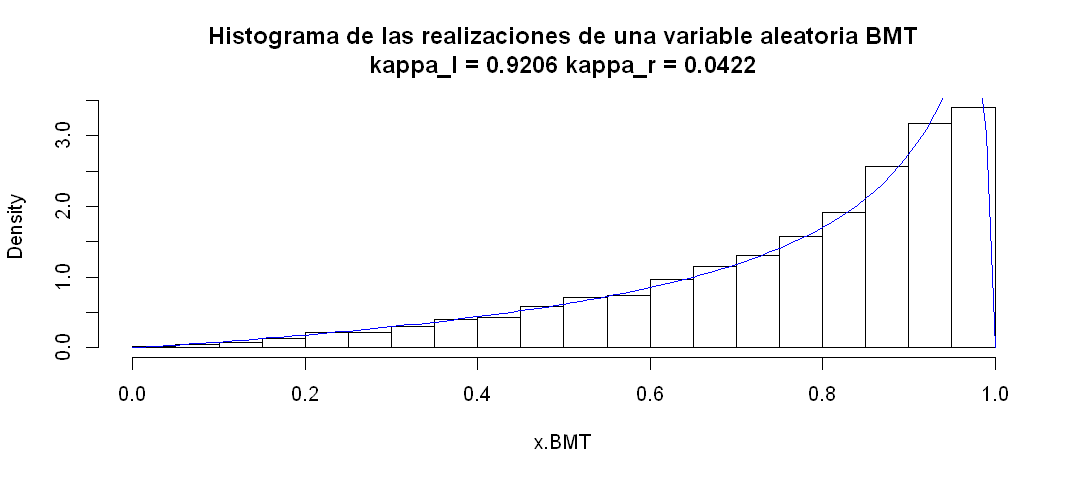

In [58]:
### Cambia el tamaño del gráfico
options(repr.plot.width = 9, repr.plot.height = 4)
### Produce el histograma de las realizaciones generadas
hist(x.BMT, freq = FALSE, breaks = 20, 
     main = paste0("Histograma de las realizaciones de una variable aleatoria BMT\n", 
                   "kappa_l = ", round(kappa_l, 4), " kappa_r = ", round(kappa_r, 4)))
### Función de densidad de la distribución BMT con los parámetros kappa_l y kappa_r
curve(dBMT(x, kappa_l, kappa_r), add = TRUE, col = "blue")

## Histograma de las realizaciones BMT transformadas

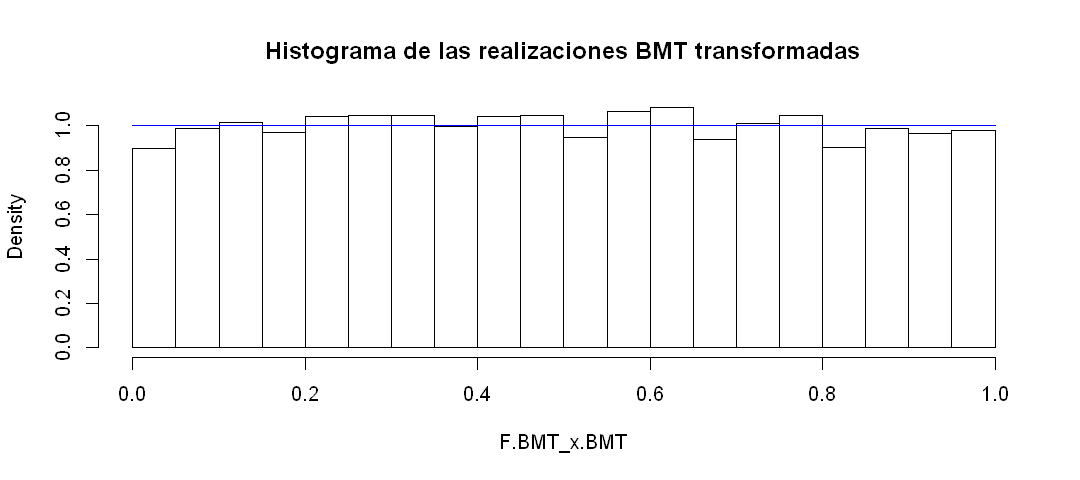

In [59]:
### Histograma de los valores resultantes al aplicar la función de distribución acumulativa de una variable aleatoria BMT
### a las realizaciones generadas
F.BMT_x.BMT <- pBMT(x.BMT, kappa_l, kappa_r)
hist(F.BMT_x.BMT, freq=FALSE, breaks = 20, 
     main="Histograma de las realizaciones BMT transformadas")
### Produce la linea asociada a la función de densidad teórica de una distribución uniforme continua
lines(c(0,1), c(1,1), col="blue")

## Histograma de las realizaciones BMT llevadas a la normal estándar (Inverse Transform. Ej: Distribución Normal Estándar)

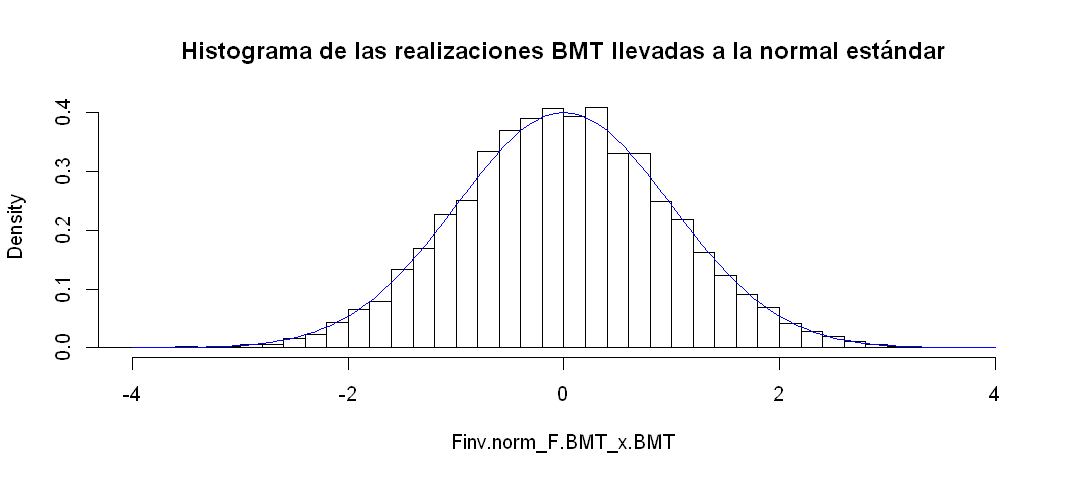

In [60]:
### Histograma de los valores resultantes al aplicar la función cuantil de una normal estándar 
### a las realizaciones BMT transformadas
Finv.norm_F.BMT_x.BMT <- qnorm(F.BMT_x.BMT, 0, 1)
hist(Finv.norm_F.BMT_x.BMT, freq=FALSE, breaks = 40, xlim = c(-4, 4), 
     main="Histograma de las realizaciones BMT llevadas a la normal estándar")
### Función de densidad asociada a la distribución normal estándar
curve(dnorm(x, 0, 1), add = TRUE, col = "blue")